CUSTOMER CHURN PREDICTION ANALYSIS (TELECOM INDUSTRY)

Goal: Predict whether a telecom customer will leave the service based on their contract, monthly charges, and tenure.
Dataset: Telco Customer Churn Dataset.


PROBLEM STATEMENT AND IMPORTANCE
The dataset (Telco Customer Churn) is designed for exploring factors influencing customer churn and retention. It is ideal for developing predictive models to identify at-risk customers and understand the dynamics of customer turnover. Customer churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for business to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving.

About Dataset:
This dataset provides a comprehensive view of customer behavior and churn in the telecom industry. It includes detailed information on customer demographics, service usage, and various indicators that are critical for analyzing customer retention and churn.

Key Features:
    CustomerID: Unique identifier for each customer.
    Age: Age of the customer, reflecting their demographic profile.
    Gender: Gender of the customer (Male or Female).
    Tenure: Duration (in months) the customer has been with the service provider.
    MonthlyCharges: The monthly fee charged to the customer.
    ContractType: Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).
    InternetService: Type of internet service subscribed to (DSL, Fiber Optic, None).
    TechSupport: Whether the customer has tech support (Yes or No).
    TotalCharges: Total amount charged to the customer (calculated as MonthlyCharges * Tenure).
    Churn: Target variable indicating whether the customer has churned (Yes or No).

Additional Information:
    Number of Samples: 1,000
    File Format: CSV
    Data Quality: Clean and ready for analysis

We are going to build a basic model for predicting customer churn using Customer churn prediction analysis. We are using some classification algorithms to model customers who have left, using Python tools such as pandas for data manupulation and matplotlib for visualization.

Steps Involved to Predict Customer Churn
    Importing Libraries
    Loading Dataset
    Exploratory Data Analysis
    Outliers using IQR method
    Cleaning and Transforming Data
        One-hot Encoding
        Rearranging Columns
        Feature Scaling
        Feature Selection
    Prediction using Logistic Regression
    Prediction using Support Vector Classifier
    Prediction using Decision Tree Clusifier
    Prdiction using KNN Classifier

Importing Libraries

In [2]:
#import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading Dataset
Pandas is used to read the dataset and process it

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Project\customer_churn_data.csv')
df.shape

(1000, 10)

Data Exploration and Cleaning
Perform Exploratory Data Analysis (EDA) and clean the dataset
Exploratory Data Analysis

In [4]:
#getting the first 5 rows
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
#getting the last 5 rows of the dataset
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [6]:
#finding total rows and columns of the dataset
df.shape

(1000, 10)

In [7]:
#finding the datatypes of the columns
df.dtypes

CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

In [8]:
#finding the size of the dataset (columns * rows)
df.size

10000

In [9]:
#columns of the dataset
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [10]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [11]:
#finding whether there are null values or missing values in the dataset
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [12]:
#check duplicate values in the dataset
df.duplicated().sum()

0

Categorizing the columns into there types and defining the target

In [13]:
categorical_features = [
    "Gender",
    "ContractType",
    "InternetService",
    "TechSupport",
    "Churn",
]
numerical_features = [
    "Age",
    "Tenure",
    "MonthlyCharges",
    "TotalCharges",
]
target = "Churn"

In [14]:
#getting the skewness of the numerical features
df.skew(numeric_only=True)

CustomerID        0.000000
Age               0.110598
Tenure            1.639064
MonthlyCharges    0.014264
TotalCharges      2.257802
dtype: float64

In [15]:
#getting the correlation of the numerical features
df.corr(numeric_only=True)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


Feature Distribution

We plot distributions for numerical and categorical to check for outliers and compare feature distributions with target variable.

Numerical Features Distribution

Numerical summarizing techniques (mean, standard deviation, etc.) do not show us spike, shapes of distributions and it is hard to observe outliers with it thus using histograms.

In [16]:
# Describing the numerical features
df[numerical_features].describe()



,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,18.97300,74.391290,1404.364060
std,9.797741,18.89257,25.712083,1571.755048
min,12.000000,0.00000,30.000000,0.000000
25%,38.000000,5.00000,52.357500,345.217500
50%,45.000000,13.00000,74.060000,872.870000
75%,51.000000,26.00000,96.102500,1900.175000
max,83.000000,122.00000,119.960000,12416.250000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

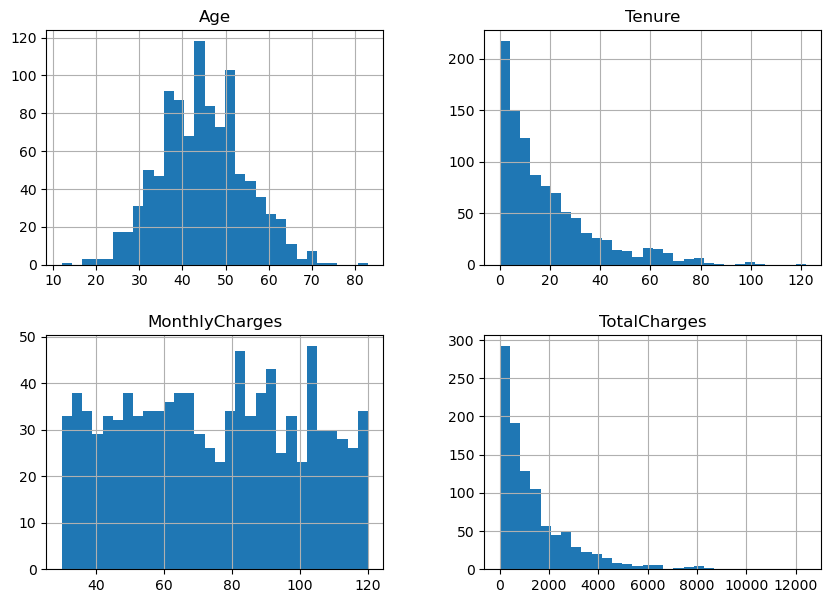

In [17]:
#plotting the histogram of the numerical_features
df[numerical_features].hist(bins=30, figsize=(10, 7))

Considering the numerical features in relation to the target variable, We can observe that the greater TotalCharges and Tenure the less is the probability of churn.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

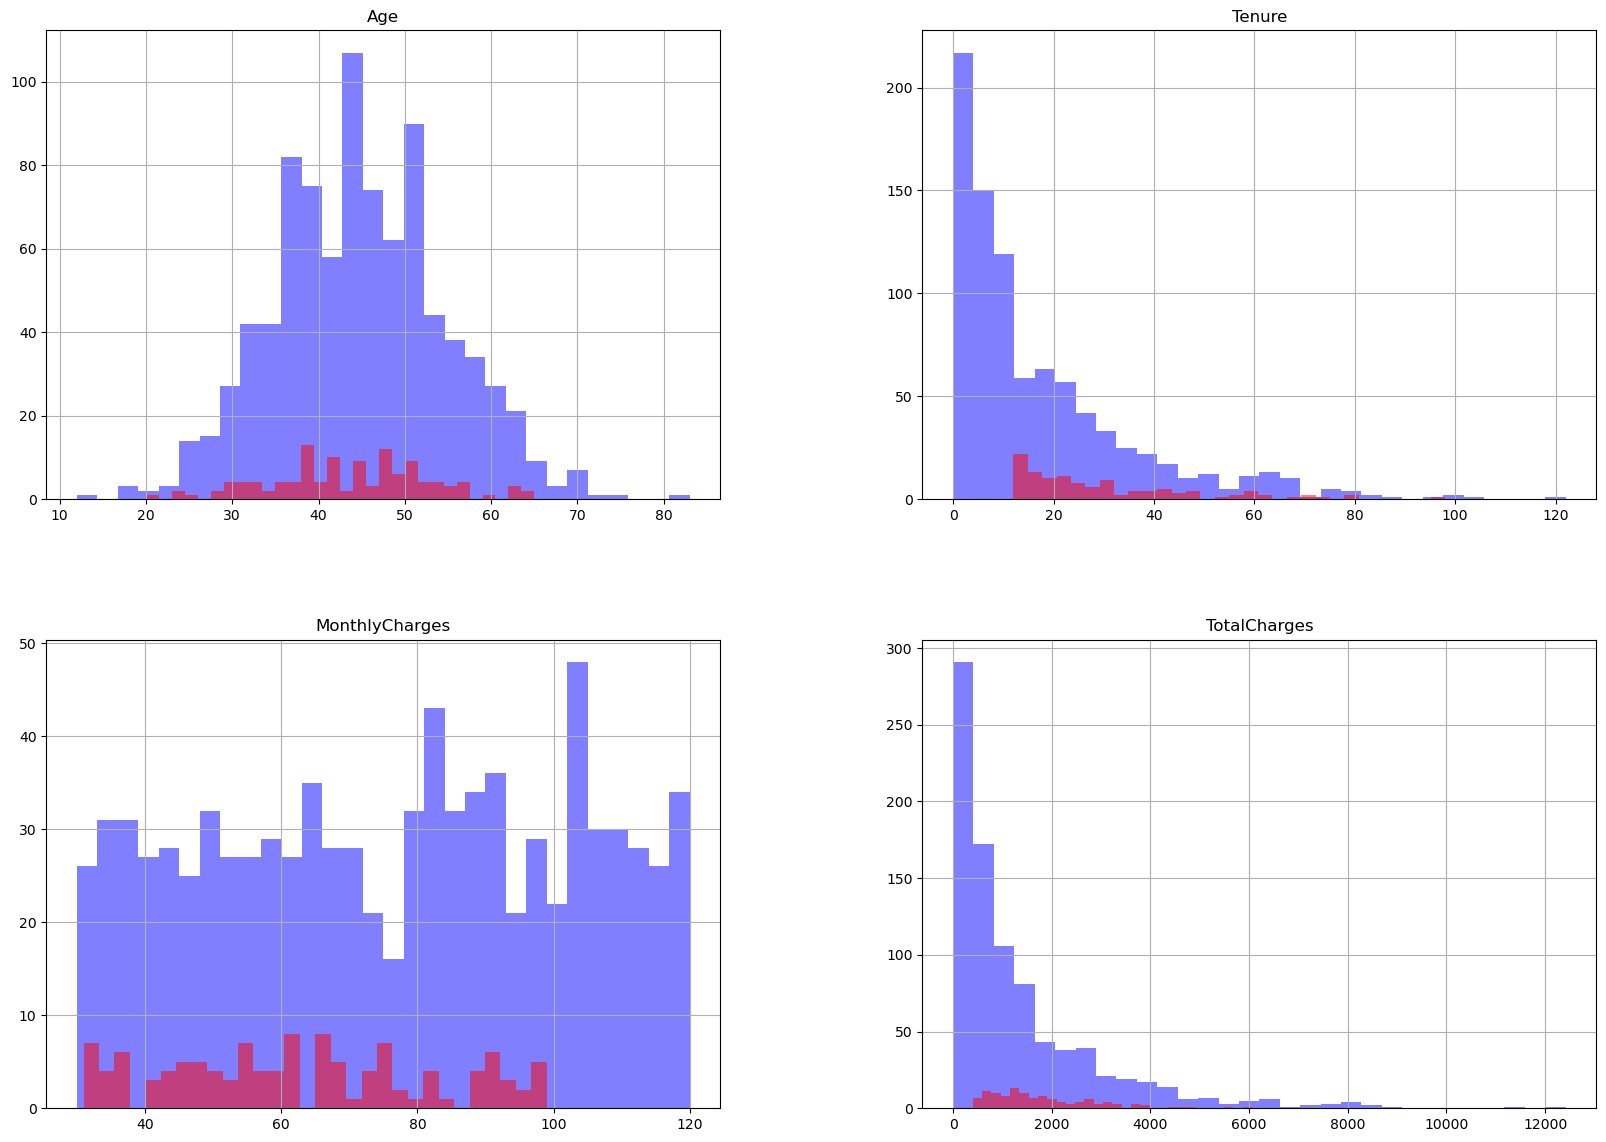

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 14))
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "No"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

Categorical Feature Distribution
To analyze categorical features, we use bar charts. We observe that senior and customers without phone service are less represented in the data.

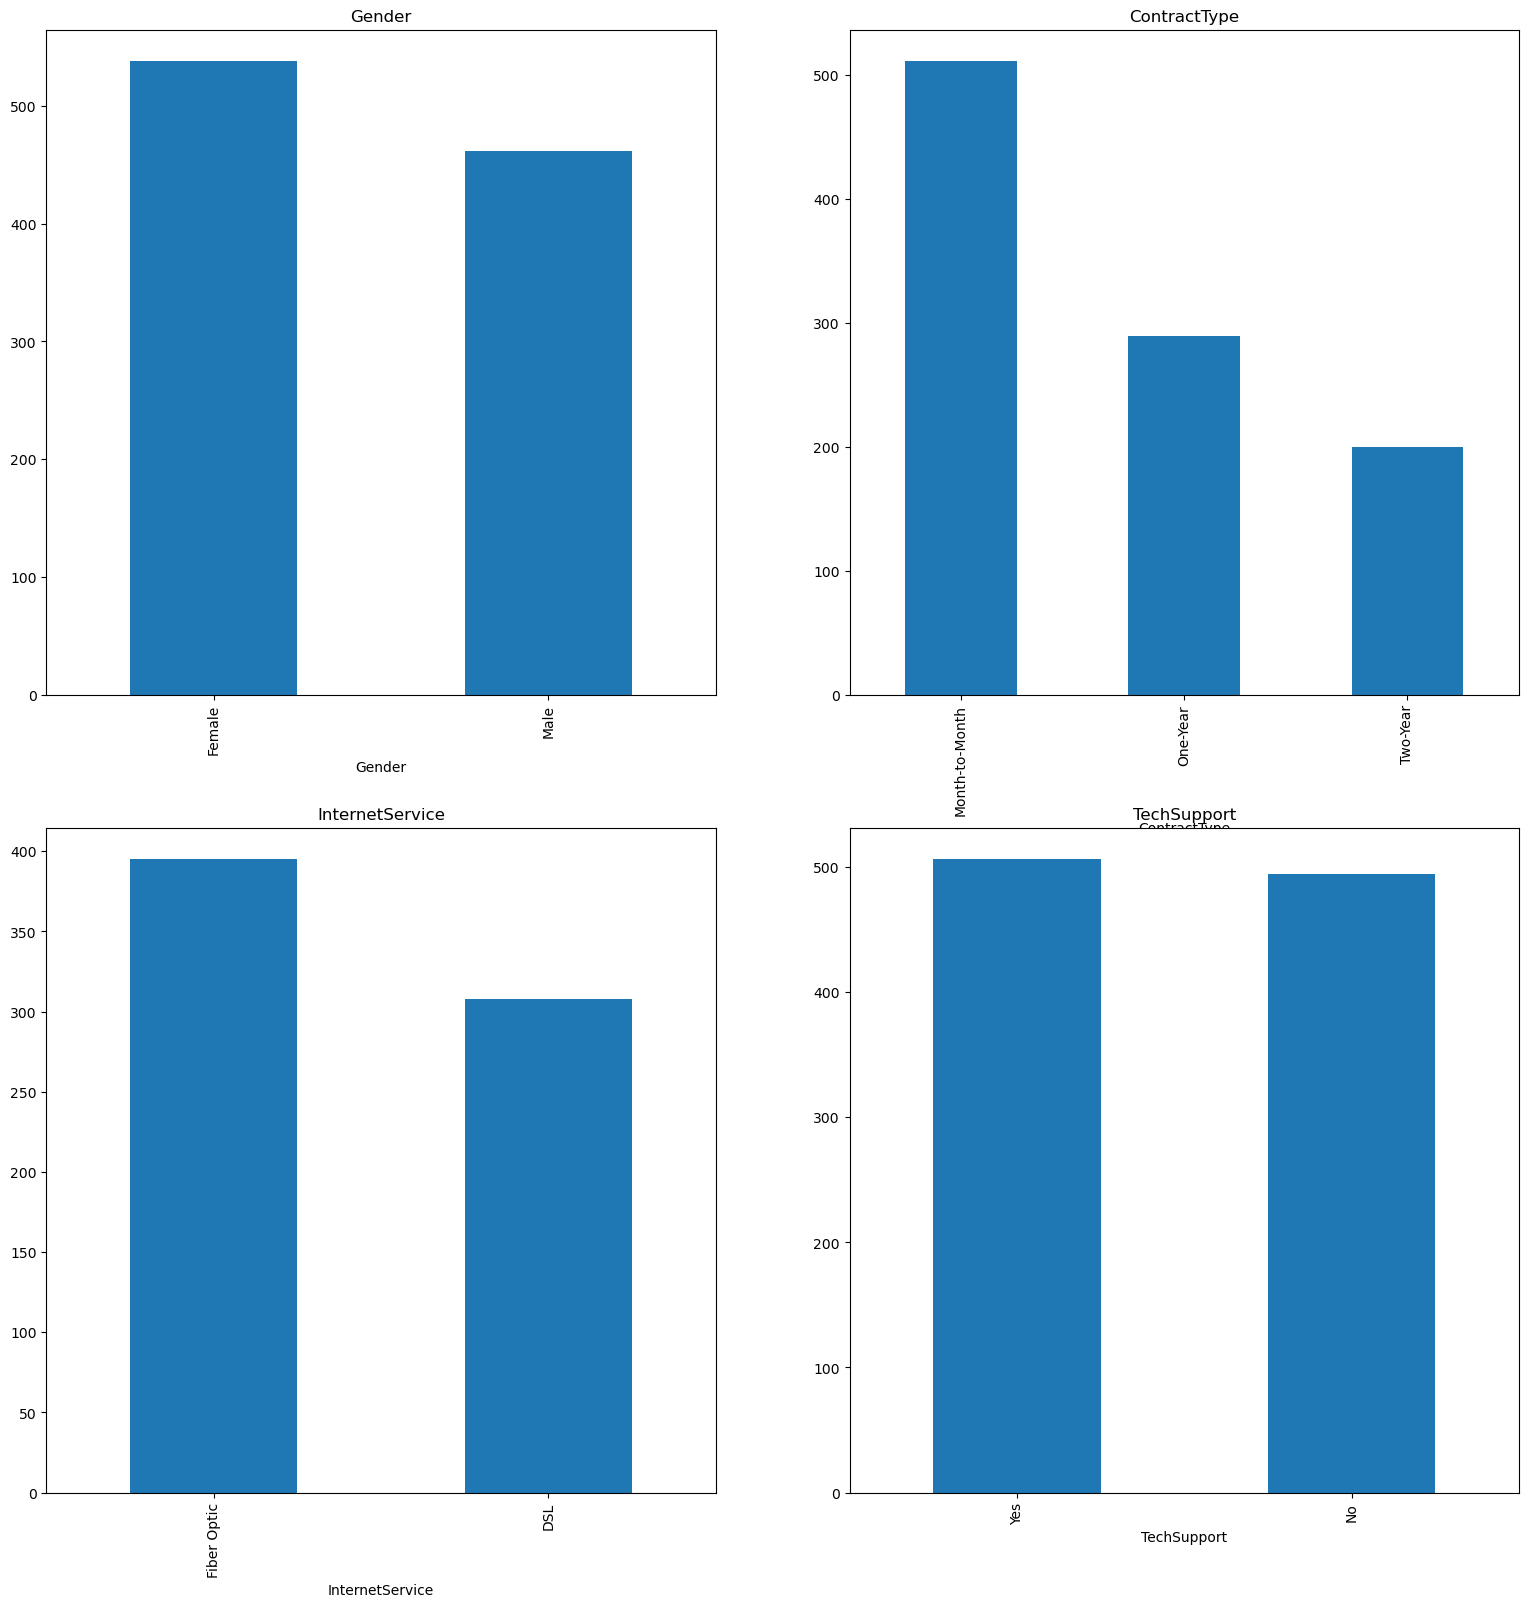

In [19]:
ROWS, COLS = 2, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(19, 19))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[row, col]).set_title(categorical_feature)
    col += 1
    if col == COLS:  # Move to the next row if the column index exceeds COLS
        col = 0
        row += 1
    if row == ROWS:  # Break the loop if the row index exceeds ROWS
        break

The next step is to look at categorical features in relation to the target variables. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

Text(0.5, 1.0, 'Churned')

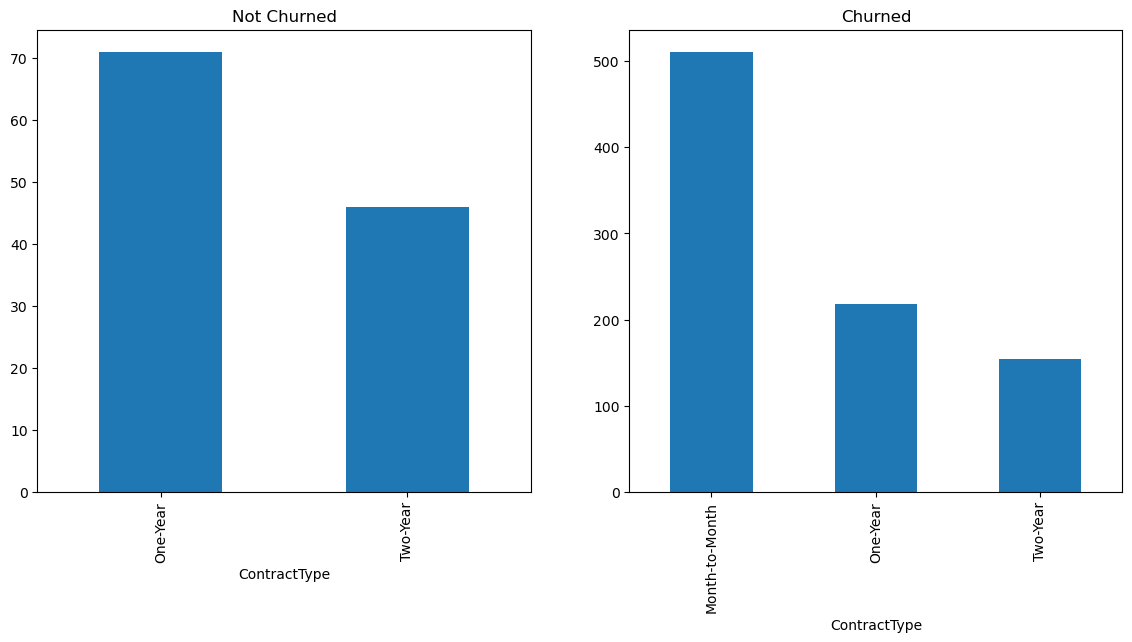

In [20]:
feature = 'ContractType'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
df[df.Churn == "No"][feature].value_counts().plot(kind="bar", ax=ax[0]).set_title("Not Churned")
df[df.Churn == "Yes"][feature].value_counts().plot(kind="bar", ax=ax[1]).set_title("Churned")

Target Varible Distribution

Text(0.5, 1.0, 'churned')

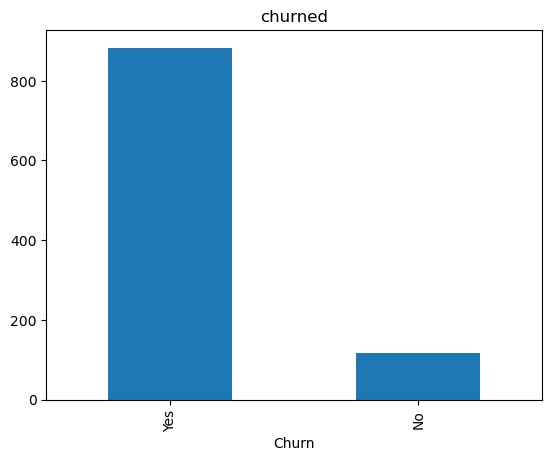

In [21]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compared to churned users. The model would achieve high accuracy as it would mostly predict majority class-users who didin't churn in our example.

Few thing we can do to minimize the influence of imbalanced dataset:
    resample data
    collect more samples
    use precision and recall as accuracy metrics

    

Outliers Analysis with Interquartile Range (IQR) Method that aids to identify extreme values that may impact data analysis and modeling.

In [22]:
#checking for outliers in the variables: Tenure and MonthlyCharges
x = ['Tenure','MonthlyCharges']
def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation='nearest')
    q3 = data[col].quantile(0.75,interpolation='nearest')
    q4 = data[col].quantile(1,interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5*IQR
    ULP = q3 + 1.5*IQR
    if data[col].min() > LLP and data[col].max() < ULP:
        print("No Outliers in",i)
    else:
        print("There are outliers in",i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

There are outliers in Tenure
count of outliers are: 61
No Outliers in MonthlyCharges


Cleaning and Transforming Data

In [23]:
df.drop(['CustomerID'],axis = 1,inplace = True)

In [24]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


Dropped CustomerID because it is not needed


On Hot Encoding

In [25]:
df1 = pd.get_dummies(data = df,columns=['Gender',
       'ContractType', 'InternetService', 'TechSupport',
       'Churn'],dtype=int)

In [26]:
df1.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,TechSupport_No,TechSupport_Yes,Churn_No,Churn_Yes
0,49,4,88.35,353.40,0,1,1,0,0,0,1,0,1,0,1
1,43,0,36.67,0.00,0,1,1,0,0,0,1,0,1,0,1
2,51,2,63.79,127.58,1,0,1,0,0,0,1,1,0,0,1
3,60,8,102.34,818.72,1,0,0,1,0,1,0,0,1,0,1
4,42,32,69.01,2208.32,0,1,1,0,0,0,0,1,0,0,1


In [27]:
df1.columns

Index(['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'ContractType_Month-to-Month', 'ContractType_One-Year',
       'ContractType_Two-Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'TechSupport_No', 'TechSupport_Yes',
       'Churn_No', 'Churn_Yes'],
      dtype='object')

The imputer will replace missing values with the mean of the non-missing values for the respective columns

In [28]:
# Fixing the import and class name
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1['TotalCharges'] = imputer.fit_transform(df1['TotalCharges'].values.reshape(-1, 1))

Feature Engineering and Selection
Create new features and remove irrelevant ones.

Feature Scaling

In [29]:
# Fixing the import and class name
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop(['Churn_Yes'], axis=1))
scaled_features = scaler.transform(df1.drop('Churn_Yes', axis=1))

Feature Selection

In [30]:
# Ensure scikit-learn is installed
#%pip install scikit-learn

from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

In [31]:
# Feature Engineering: Create a new feature 'TotalSpendingPerYear'
df['TotalSpendingPerYear'] = df['MonthlyCharges'] * 12


In [32]:
# Drop irrelevant features (assuming 'CustomerID' is irrelevant)
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
# Label Encoding for binary categorical features (e.g., Yes/No columns)
label_encoder = LabelEncoder()
binary_columns = ['Churn', 'TechSupport']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [33]:
# One-Hot Encoding for multi-class categorical features
df = pd.get_dummies(df, columns=['ContractType', 'InternetService'], drop_first=True)

In [34]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,TotalSpendingPerYear,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic
0,49,Male,4,88.35,353.40,1,1,1060.20,False,False,True
1,43,Male,0,36.67,0.00,1,1,440.04,False,False,True
2,51,Female,2,63.79,127.58,0,1,765.48,False,False,True
3,60,Female,8,102.34,818.72,1,1,1228.08,True,False,False
4,42,Male,32,69.01,2208.32,0,1,828.12,False,False,False


In [35]:
# Perform correlation analysis for feature selection
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                            Age    Tenure  MonthlyCharges  TotalCharges  \
Age                   1.000000  0.000472        0.006362     -0.001896   
Tenure                0.000472  1.000000       -0.014552      0.894868   
MonthlyCharges        0.006362 -0.014552        1.000000      0.304893   
TotalCharges         -0.001896  0.894868        0.304893      1.000000   
TechSupport          -0.097434 -0.031601       -0.017879     -0.048584   
Churn                 0.044115 -0.217675        0.167773     -0.101523   
TotalSpendingPerYear  0.006362 -0.014552        1.000000      0.304893   

                      TechSupport     Churn  TotalSpendingPerYear  
Age                     -0.097434  0.044115              0.006362  
Tenure                  -0.031601 -0.217675             -0.014552  
MonthlyCharges          -0.017879  0.167773              1.000000  
TotalCharges            -0.048584 -0.101523              0.304893  
TechSupport              1.000000 -0.359667   

The correlation matrix shows relationships between different variables. **Tenure and TotalCharges (0.89)** have a strong positive correlation, indicating that longer tenure leads to higher total charges. **Churn and Tenure (-0.22)** have a moderate negative correlation, meaning customers with longer tenure are less likely to churn. **Churn and MonthlyCharges (0.17)** have a weak positive correlation, suggesting that higher monthly charges might contribute to churn. **Churn and TechSupport (-0.36)** show a moderate negative correlation, indicating that customers with tech support are less likely to churn. **TotalSpendingPerYear and MonthlyCharges (1.00)** are perfectly correlated, likely because TotalSpendingPerYear is derived from MonthlyCharges. Overall, tenure, tech support, and total charges play key roles in customer retention, while high monthly charges slightly increase churn risk.

In [36]:
# Import necessary classes and functions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Encode categorical variables into numerical values
X_encoded = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)  # One-hot encode categorical features
y = df['Churn']  # Target variable

# Select features using Mutual Information (measures relevance)
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_encoded, y)


MODEL BUILDING
Train a machine learning model (RandomForestClassifier).

In [37]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Output shapes of training and testing sets
print(f"Training Features Shape: {X_train.shape}, Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}, Testing Labels Shape: {y_test.shape}")

Training Features Shape: (800, 5), Testing Features Shape: (200, 5)
Training Labels Shape: (800,), Testing Labels Shape: (200,)


In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Initialize the Random Forest Classifier
# n_estimators: Number of trees in the forest, random_state: For reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Train the model on the training data
# Fit the model with features (X_train) and target variable (y_train)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

The RandomForestClassifier(random_state=42) is a machine learning model used for customer churn prediction that works by combining the results of multiple decision trees to make more accurate and stable predictions. It takes various customer features—such as tenure, contract type, monthly charges, and internet service usage—and learns patterns from historical data to classify whether a customer is likely to churn (leave) or stay. By setting random_state=42, the model's randomness is controlled to ensure consistent results across runs. Random forests are well-suited for this task because they handle both categorical and numerical data, reduce overfitting through ensemble averaging, and provide insights into which features are most influential in predicting churn.

MODEL EVALUATION AND REPORTING
Evaluate model performance and prepare a final report.

In [41]:
# Make predictions on the test set
# Predict the target variable for the test set features (X_test)
y_pred = model.predict(X_test)

In [42]:

# Evaluate model performance
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.95


In [43]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Use 1 if the positive class is represented by 1
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

In [44]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.95
Precision: 0.96
Recall: 0.99
F1 Score: 0.97


From the output above;
The customer churn prediction model performs exceptionally well, with **93% accuracy**. It correctly identifies **98% of churners (recall)**, ensuring minimal missed opportunities for retention. With **95% precision**, most predicted churners are actual churners, reducing unnecessary interventions. The **96% F1 score** balances precision and recall, confirming the model’s reliability. While strong at detecting churners, some false positives exist, meaning a few loyal customers may be misclassified. Businesses can use these insights to **proactively engage at-risk customers** with personalized offers and retention strategies. Fine-tuning the model threshold may further enhance precision without sacrificing recall.

In [45]:
# Plot a confusion matrix to visualize predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 15   8]
 [  2 175]]


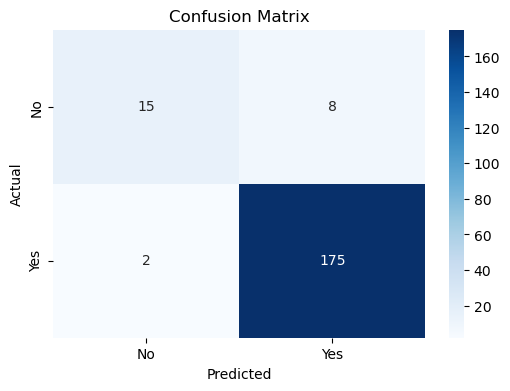

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix helps to evaluate the performance of a classification model that predicts whether a customer will churn (leave) or stay.
Understanding the Confusion Matrix:
    **True Positives (TP = 175)**: The model correctly predicted that 175 customers would churn.
    **False Positives (FP = 8)**: The model incorrectly predicted that 8 customers would churn, but they actually stayed.
    **True Negatives (TN = 15)**: The model correctly predicted that 15 customers would stay.
    **False Negatives (FN = 2)**: The model incorrectly predicted that 2 customers would stay, but they actually churned.

In [47]:
# Print the classification report for precision, recall, F1-score, etc.
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No', 'Yes']))


Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.65      0.75        23
         Yes       0.96      0.99      0.97       177

    accuracy                           0.95       200
   macro avg       0.92      0.82      0.86       200
weighted avg       0.95      0.95      0.95       200



The classification report provides a deeper evaluation of the churn prediction model based on key performance metrics: precision, recall, and F1-score.

**Class-wise Performance:**
    Class "No" (Customers who did not churn)
        Precision: 0.88 → When the model predicts a customer will stay, it is correct 88% of the time.
        Recall: 0.65 → The model correctly identifies 65% of the actual non-churners.
        F1-score: 0.75 → The harmonic mean of precision and recall indicates moderate performance in identifying non-churners.
        Support: 23 → There are 23 actual non-churners in the dataset.

    Class "Yes" (Customers who churned)
        Precision: 0.96 → When the model predicts churn, it is correct 96% of the time.
        Recall: 0.99 → The model captures 99% of actual churners, meaning very few churners are missed.
        F1-score: 0.97 → A high F1-score indicates excellent prediction capability for churners.
        Support: 177 → There are 177 actual churners in the dataset.

Overall Model Performance:
**Accuracy (0.95 or 95%):** The model correctly predicts churn or no churn for 95% of customers.

**Macro Average (Precision: 0.92, Recall: 0.82, F1-score: 0.86)**7
        The macro average treats both classes equally, even though "Yes" (churners) is more common.
        The lower recall for "No" (0.65) brings down this average, suggesting the model struggles to correctly classify non-churners.

**Weighted Average (Precision: 0.95, Recall: 0.95, F1-score: 0.95)**
        This weighted average accounts for class imbalance (more churners than non-churners).
        The high values confirm that the model prioritizes churn detection, which is crucial for customer retention strategies.

**Business Insights:**
    Strengths: The model is highly effective at detecting churners (99% recall), meaning businesses can take action before these customers leave.
    Weaknesses: The model struggles with predicting customers who will stay (65% recall for "No"). This could lead to unnecessary retention efforts for some customers who were unlikely to churn.

**Next Steps:**
        Improve recall for "No" (non-churners) by balancing the dataset or adjusting the decision threshold.
        Consider collecting more data on retained customers to help the model learn patterns of those who stay.